In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv("olive.csv") #loading olive.csv

   # Taking variables of interest and some basic exploration

## Removing Region and Area

In [7]:
names = list(data.columns)
names.remove ('Region')
names.remove ('Area')
names.remove('Unnamed: 0')
olive = data[names]
olive.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46


## Visualizing distribution of each variable

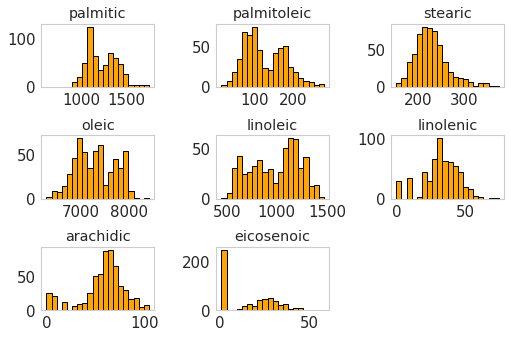

In [8]:
olive.hist(bins=20, color='orange', edgecolor='black', linewidth=1.0,
              xlabelsize=15, ylabelsize=15, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### First, we plot by Region


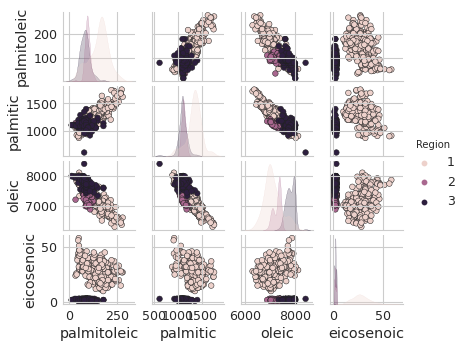

In [9]:
#After running many times, we choose the remarkable variables. We add Region
#Variable because we want to plt by Region
cols = ['palmitoleic', 'palmitic', 'oleic','eicosenoic', 'Region']
sns.pairplot(data[cols], height = 1.2, aspect = 1.2,  hue = 'Region',
            plot_kws=dict(edgecolor="k", linewidth=0.5))

## Second, we plot by Area

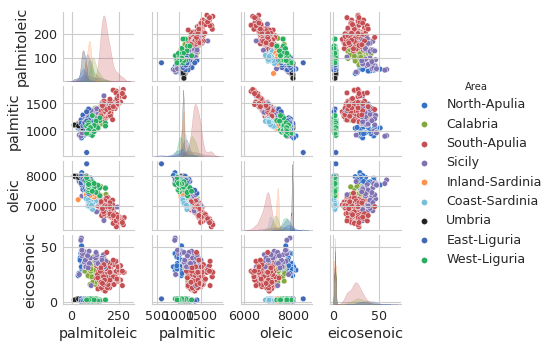

In [10]:
cols = ['palmitoleic', 'palmitic', 'oleic','eicosenoic', 'Area']
sns.pairplot(data[cols], hue = 'Area', height = 1.2, aspect = 1.2)

## Correlation Heat Map

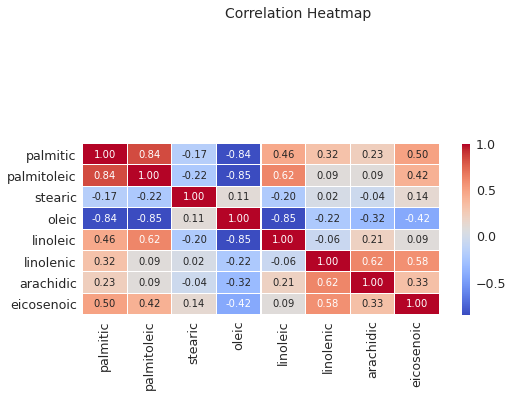

In [11]:
f, ax = plt.subplots(figsize=(8, 5))
corr = olive.corr()
hm = sns.heatmap(round(corr,2), annot=True, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.6)
t= f.suptitle('Correlation Heatmap', fontsize=14)

## Parallel coordinate map

### By Area

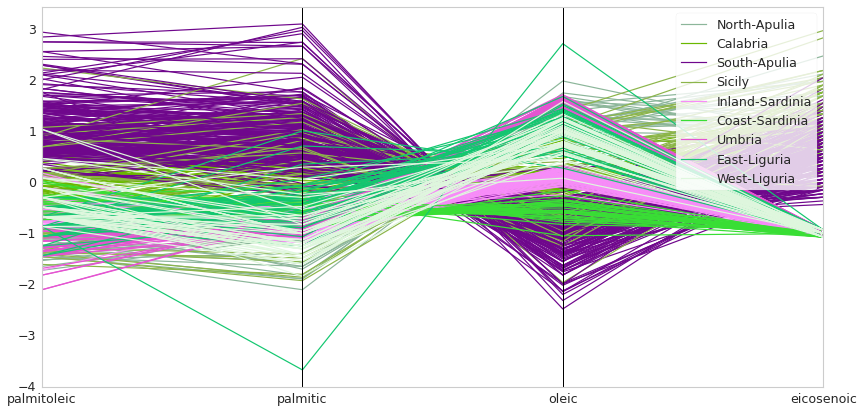

In [12]:
#First, we standarize the dataframe of interest, to get the same scale
scaler = StandardScaler()
olive_sd = scaler.fit_transform(data[cols[0:4]])
olive_sd = pd.DataFrame(olive_sd, columns = cols[:4])

olive_sd_aux = pd.concat([data['Area'], olive_sd], axis = 1)
plt.figure(figsize = (14,7))
pc = parallel_coordinates(frame = olive_sd_aux, class_column = 'Area')

### By Region

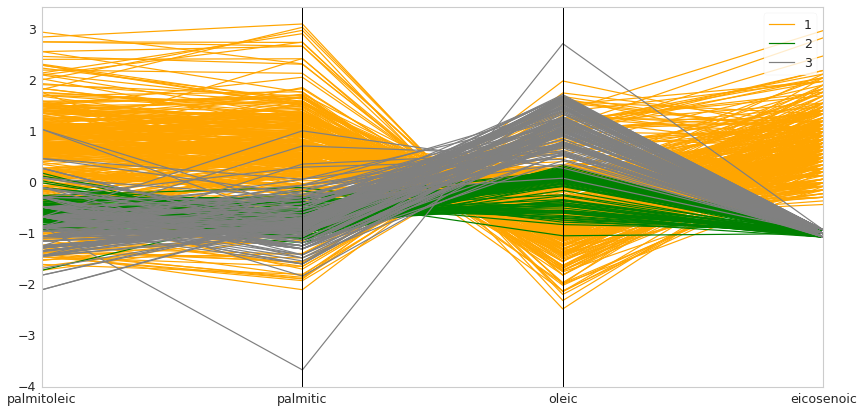

In [13]:
#First, we standarize the dataframe of interest, to get the same scale
scaler = StandardScaler()
olive_sd = scaler.fit_transform(data[cols[0:4]])
olive_sd = pd.DataFrame(olive_sd, columns = cols[:4])

olive_sd_aux = pd.concat([data['Region'], olive_sd], axis = 1)
plt.figure(figsize = (14,7))
pc = parallel_coordinates(frame = olive_sd_aux, class_column = 'Region',
                          color = ("orange", "green", "gray"))

# Trying to recognize regions

In [37]:
X = olive.to_numpy() #converting data frame to data matrix

In [68]:
#Creating a projection matrix:
A = np.array([[0.486, 0.082],
             [0,0],
             [0,0],
             [0,0],
             [-0.161,-0.279],
             [0.485, 0.065],
             [-0.672,-0.145],
             [0.226,-0.944]])
A1 = np.array([[0.486, 1143],
             [0,265],
             [0,223],
             [0,2110],
             [-0.161,1022],
             [0.485, 74],
             [-0.672,105],
             [0.226,57]])

<AxesSubplot:xlabel='x1', ylabel='x2'>

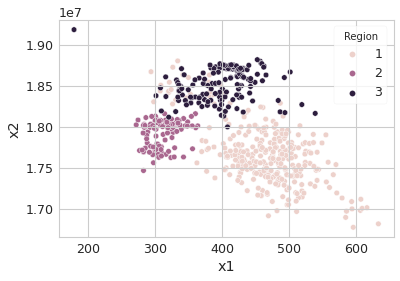

In [71]:
P = np.dot(X,A1) #Projecting Data
P_df = pd.DataFrame(P, columns = ['x1','x2'])
region_df = pd.concat([P_df,data['Region']], axis = 1)
sns.scatterplot(data = region_df, x = 'x1', y = "x2", hue='Region')

# Trying to recognize areas

In [93]:
#Since there are many regions, we divide by the most representative ones with categories:
data['Categories'] = data['Area'].apply(lambda region : 
                                         'orange' if region == 'West-Liguria'
                                         else 'purple' if region in ['East-Liguria','Umbria','Coast-Sardinia','Inland-Sardinia']
                                         else 'black' if region == 'South-Apulia' 
                                         else 'red' )

data['Categories']

0         red
1         red
2         red
3         red
4         red
        ...  
567    orange
568    orange
569    orange
570    orange
571    orange
Name: Categories, Length: 572, dtype: object

In [98]:
# Creating a projection matrix for area split
A = np.array([[0.292, -0.019],
             [-0.476,0.156],
             [0,0],
             [0.175,-0.049],
             [0,0],
             [0, 0],
             [0.748,-0.278],
             [0.313,0.946]])
A1 = np.array([[0.292, 1143],
             [-0.476,265],
             [0,223],
             [0.175,2110],
             [0,1022],
             [0, 74],
             [0.748,105],
             [0.313,57]])

In [101]:
P = np.dot(X,A)

<AxesSubplot:xlabel='x1', ylabel='x2'>

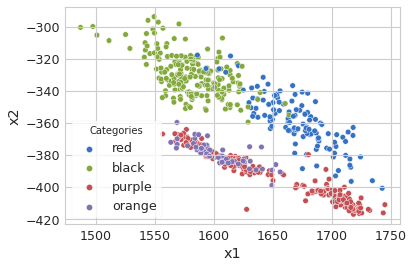

In [105]:
P_df = pd.DataFrame(P, columns = ['x1','x2'])
area_df = pd.concat([P_df,data['Categories']], axis = 1)
sns.scatterplot(data = area_df, x = 'x1', y = "x2", hue='Categories')